# Question-6

In [175]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Part-1

In [176]:
def histEqualization(img,ret_cdf=False):
    img = img.astype(np.uint8)
    u,c = np.unique(img,return_counts=True)
    pdf = np.zeros((256,1))
    for i in range(u.size):
        pdf[u[i]] = c[i]
#     pdf[u[:]] = c
    cdf = (np.cumsum(pdf))/img.size
    a = cdf[np.min(u)]
    out = (255/(1-a))*((cdf[img.flat] - a).reshape(img.shape))
    if ret_cdf:
        return cdf
    else:
        return out.astype(np.uint8)

def histMatching(img,ref_img):
    temp = histEqualization(img,ret_cdf=True)
    temp1 = histEqualization(ref_img,ret_cdf=True)
    
    cdf = np.interp(temp,temp1,range(0,256))
#     a = cdf[np.min(u)]
    out = (cdf[img.flat]).reshape(img.shape)
    
    return out.astype(np.uint8)

# Part-2

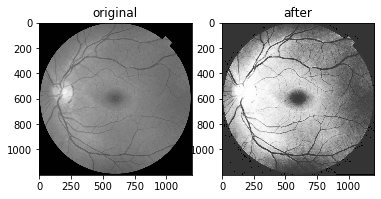

In [177]:
img = cv2.cvtColor(cv2.imread('./DIP_2019_A1/eyeref.png'),cv2.COLOR_BGR2GRAY)
out = histEqualization(img)

fig = plt.figure()
fig.add_subplot(121)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,2,2)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [178]:
print("Avg. pixel value of input and output images are",np.sum(img)/img.size,np.sum(out)/img.size)

Avg. pixel value of input and output images are 90.28324791666667 133.06808680555557


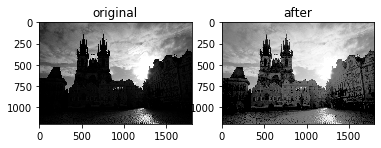

In [179]:
img = cv2.cvtColor(cv2.imread('./DIP_2019_A1/church.png'),cv2.COLOR_BGR2GRAY)
out = histEqualization(img)

fig = plt.figure()
fig.add_subplot(121)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,2,2)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [180]:
print("Avg. pixel value of input and output images are",np.sum(img)/img.size,np.sum(out)/img.size)

Avg. pixel value of input and output images are 72.16258148148148 112.82962824074075


Here, we can see that the image became more brighter. As the mean pixel values of input and output images suggest that image's avg intensity value is increased(shift towards brighter side). This happened because the probability distribution of intensity values is **more at low intensities and low at high intensities**.
In Histogram Equalization we try to make that distribution uniform. So, we decrease the number of low intensity pixels and increase the number of high intensity pixels. This makes the image to shift towards the brighter side.

# Part-3

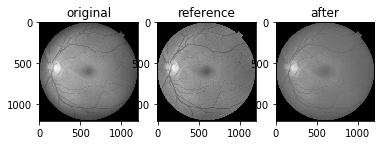

In [181]:
img = cv2.cvtColor(cv2.imread('./DIP_2019_A1/eye.png'),cv2.COLOR_BGR2GRAY)
img_ref = cv2.cvtColor(cv2.imread('./DIP_2019_A1/eyeref.png'),cv2.COLOR_BGR2GRAY)
out = histMatching(img,img_ref)

fig = plt.figure()
fig.add_subplot(131)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,3,2)
plt.title('reference')
plt.imshow(img_ref,'gray')
plt.subplot(1,3,3)
plt.title('after')
plt.imshow(out,'gray')
plt.show()

In [182]:
print("Avg. pixel value of input and output images are",np.sum(img)/img.size,np.sum(out)/img.size)

Avg. pixel value of input and output images are 53.002427777777775 89.74926736111111


# Part-4

In [183]:
img = cv2.cvtColor(cv2.imread('./DIP_2019_A1/canyon.png'),cv2.COLOR_BGR2GRAY)
part1 = cv2.cvtColor(cv2.imread('./DIP_2019_A1/part1.png'),cv2.COLOR_BGR2GRAY)
part2 = cv2.cvtColor(cv2.imread('./DIP_2019_A1/part2.png'),cv2.COLOR_BGR2GRAY)
part3 = cv2.cvtColor(cv2.imread('./DIP_2019_A1/part3.png'),cv2.COLOR_BGR2GRAY)
part4 = cv2.cvtColor(cv2.imread('./DIP_2019_A1/part4.png'),cv2.COLOR_BGR2GRAY)
out1 = histMatching(part1,img[0:part1.shape[0],0:part1.shape[1]])
out2 = histMatching(part2,img[0:part1.shape[0],part1.shape[1]:])
out3 = histMatching(part3,img[part1.shape[0]:,0:part1.shape[1]])
out4 = histMatching(part4,img[part1.shape[0]:,part1.shape[1]:])
out = np.concatenate((np.concatenate((out1,out2),axis=1),np.concatenate((out3,out4),axis=1)),axis=0)

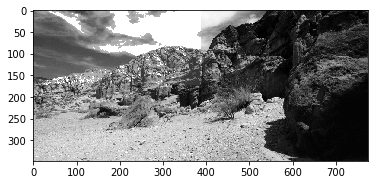

In [184]:
# fig = plt.figure()
# fig.add_subplot(121)
# plt.title('original')
# plt.imshow(img,'gray')
# plt.subplot(1,2,2)
# plt.title('generated')
# plt.imshow(out,'gray')
# plt.show()
plt.imshow(out,'gray')
plt.savefig('output.png')